# Loan Repayment Prediction

> Welcome to KnowledgeHut AI hackathon – Loan Repayment Assessment in Banking. You are required  to build and train a model that identifies a customer will repay or default from the loan dataset. This  dataset is included in loan data, and provides a challenging classifier that will test what you have learnt  in this course

Table Content

# Data Collection

In [16]:
# importing the libraries to use for uploading data
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
# uploading the teleco churn data into pandas dataframe
train_df = pd.read_csv('/Users/mrinalsachdeva/loan-repayment-prediction/Data/train_loan_data.csv')
test_df = pd.read_csv('/Users/mrinalsachdeva/loan-repayment-prediction/Data/test_loan_data.csv')

In [18]:
# reading the basic information recevied for anaylsis
train_df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-00,10+ years,Sports Group Manager,664,660,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201,93.5,G3,60 months,Debt consolidation,42,Verified,Defaulted
79996,NH,45000.0,Aug-95,10+ years,Web Designer,684,680,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145,56.9,C1,36 months,Debt consolidation,14,Not Verified,Paid
79997,NY,90000.0,Apr-05,< 1 year,Program Officer,724,720,B,OWN,Individual,...,0.0,debt_consolidation,3910,25.6,B4,36 months,Debt consolidation,26,Source Verified,Paid
79998,TX,94000.0,Apr-92,3 years,Sr. Business Analyst,669,665,D,MORTGAGE,Individual,...,1.0,credit_card,11897,49.4,D5,60 months,Credit card refinancing,48,Source Verified,Paid


In [19]:
# reading the basic information recevied for anaylsis
test_df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified


In [20]:
# checking the data type, missing value in all columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

# Data Preprocessing 

## Data Cleaning

In [21]:
# checking the unique value in all columns
for column in train_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, train_df[column].unique()))
    print('-------------------------------------------------------------------')

Column: addr_state - Unique Values: ['CO' 'CA' 'FL' 'IL' 'MD' 'NY' 'PA' 'WI' 'UT' 'TX' 'AL' 'KS' 'AR' 'AZ'
 'MI' 'MN' 'LA' 'HI' 'NC' 'VT' 'OK' 'KY' 'ME' 'CT' 'AK' 'NJ' 'IN' 'GA'
 'MA' 'OR' 'NM' 'VA' 'TN' 'SC' 'NV' 'WY' 'WA' 'WV' 'MO' 'OH' 'MS' 'DC'
 'NE' 'ID' 'NH' 'RI' 'SD' 'MT' 'DE' 'ND' 'IA']
-------------------------------------------------------------------
Column: annual_inc - Unique Values: [  85000.   40000.   60000. ...   25125.  121386. 1100000.]
-------------------------------------------------------------------
Column: earliest_cr_line - Unique Values: ['Jul-97' 'Apr-87' 'Aug-07' 'Sep-80' 'Jul-99' 'May-91' 'Oct-86' 'Nov-95'
 'Dec-07' 'Jun-04' 'Aug-96' 'Oct-98' 'May-07' 'Oct-00' 'Jan-05' 'Apr-04'
 'Sep-00' 'Sep-93' 'Oct-01' 'May-01' 'Jun-06' 'Jan-98' 'Jan-99' 'Jul-98'
 'Jun-03' 'Jul-09' 'Nov-06' 'Feb-06' 'Aug-10' 'Apr-01' 'Dec-02' 'Jun-78'
 'Oct-04' 'Feb-04' 'Sep-06' 'May-99' 'Jan-88' 'Mar-92' 'Jun-11' 'Jul-01'
 'Feb-95' 'Dec-05' 'Nov-97' 'Sep-03' 'Feb-91' 'Dec-00' 'May-03' '

In [22]:
# Find the missing value and overall percentage and showing in a DataFrame
null = pd.DataFrame(train_df.isnull().sum(), columns=["Null Values"])
null["% Missing Values"] = (train_df.isnull().sum()/len(train_df)*100)
null[null['% Missing Values'] > 0]

,Null Values,% Missing Values
emp_length,4588,5.73500
emp_title,5018,6.27250
num_actv_bc_tl,3948,4.93500
mort_acc,2771,3.46375
tot_cur_bal,3948,4.93500
pub_rec_bankruptcies,31,0.03875
revol_util,53,0.06625
title,970,1.21250


In [23]:
# extracting all column's name.
train_df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [24]:
# Selecting the all numeric columns to find the outliars.
featureNum = [ 'annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc']

In [25]:
# checking the data type for selected feature before finding the outliar.
train_df[featureNum].dtypes

annual_inc              float64
fico_range_high           int64
fico_range_low            int64
int_rate                float64
loan_amnt                 int64
num_actv_bc_tl          float64
mort_acc                float64
tot_cur_bal             float64
open_acc                  int64
pub_rec                   int64
pub_rec_bankruptcies    float64
revol_bal                 int64
revol_util              float64
total_acc                 int64
dtype: object

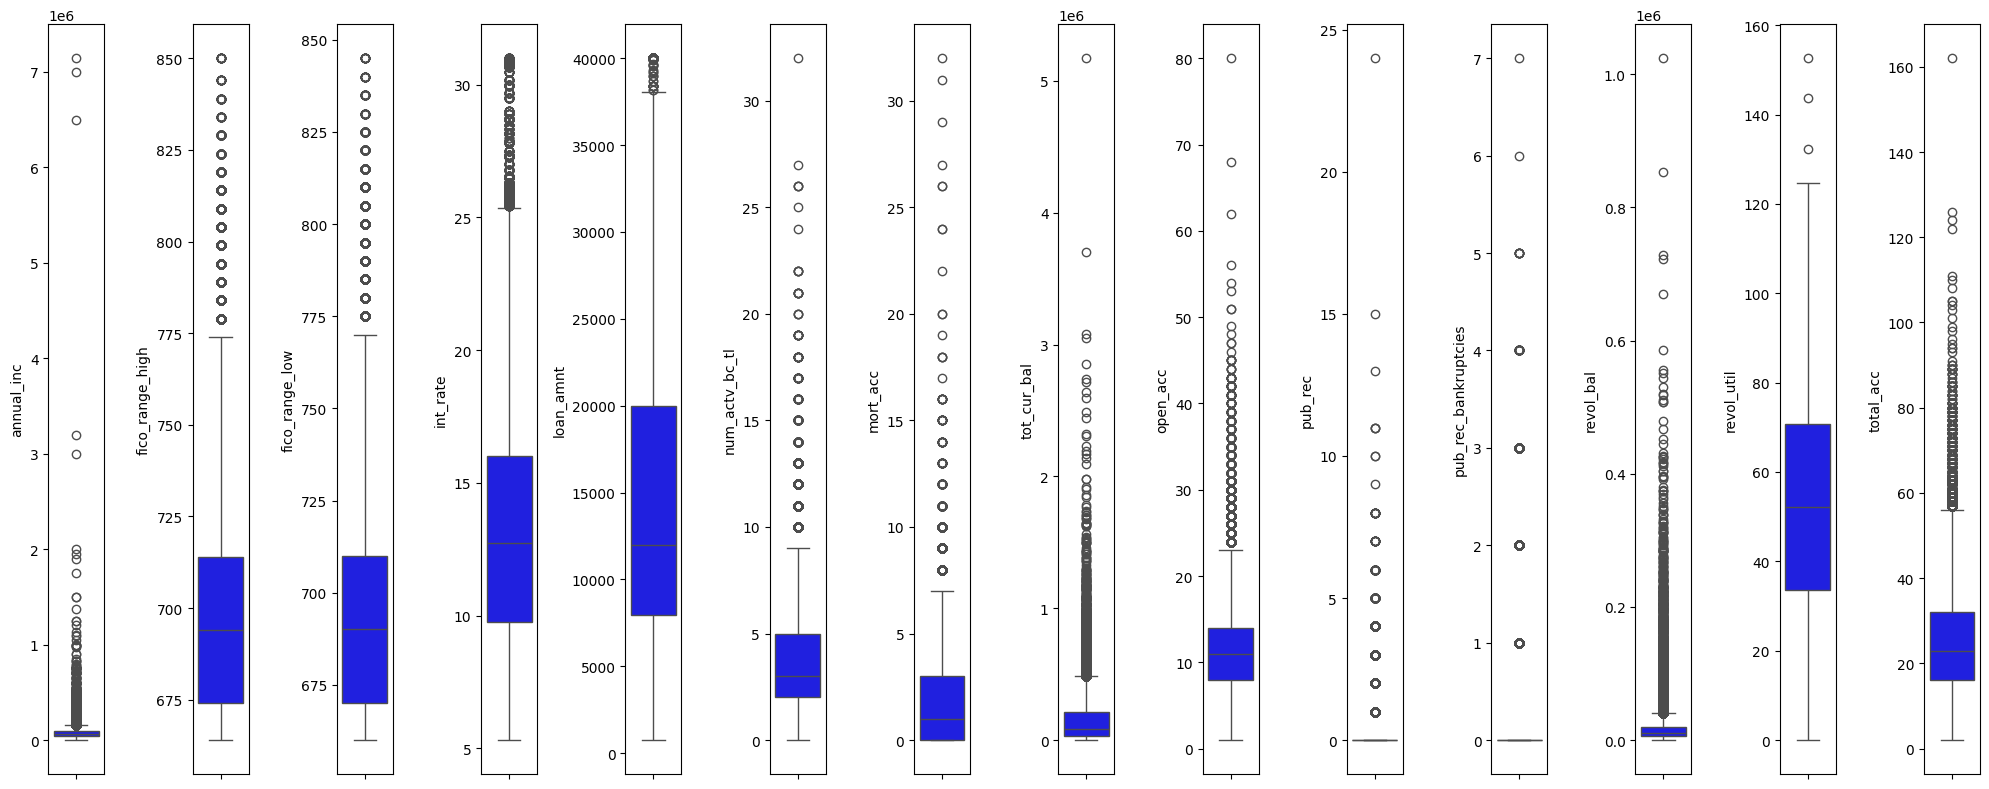

In [26]:
# Boxplot to check the outliers

plt.figure(figsize = (20,8))

for i in range(0, len(featureNum)):
  plt.subplot(1, len(featureNum), i+1)
  sns.boxplot(y = train_df[featureNum[i]], color = 'blue', orient = 'h')
  plt.tight_layout()


We can see some outliers in our features.

## Data Transformation 

In [27]:
categorical_col = [column for column in train_df.columns if train_df[column].dtype != '0']
numerical_col = [column for column in train_df.columns if train_df[column].dtype == '0']

In [28]:
train_df[categorical_col].describe

<bound method NDFrame.describe of       addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0           Jul-97  10+ years   
1             CA     40000.0           Apr-87  10+ years   
2             FL     60000.0           Aug-07  10+ years   
3             IL    100742.0           Sep-80  10+ years   
4             MD     80000.0           Jul-99  10+ years   
...          ...         ...              ...        ...   
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   
79999         NY   1100000.0           Jun-99    2 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2    

Text(0.5, 1.0, 'Loan Repayment Status')

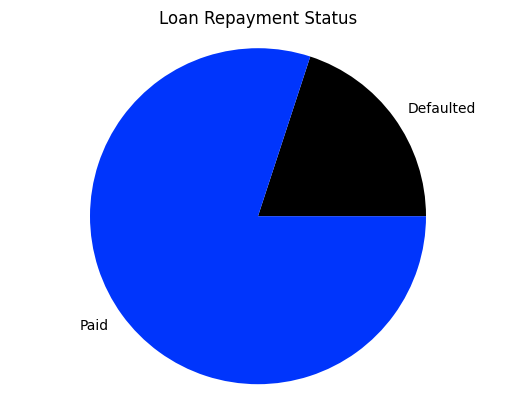

In [29]:
# create a pie chart to show the loan repayment status.
value_counts = train_df['loan_status'].value_counts().to_dict()
fig , ax = plt.subplots()
ax.pie(x= [value_counts['Defaulted'], value_counts['Paid']], labels = ['Defaulted',
                                                               'Paid'], colors = ['#000000', '#0035fc'])

ax.axis('equal')
ax.set_title("Loan Repayment Status")

Text(0.5, 0, 'loan_status')

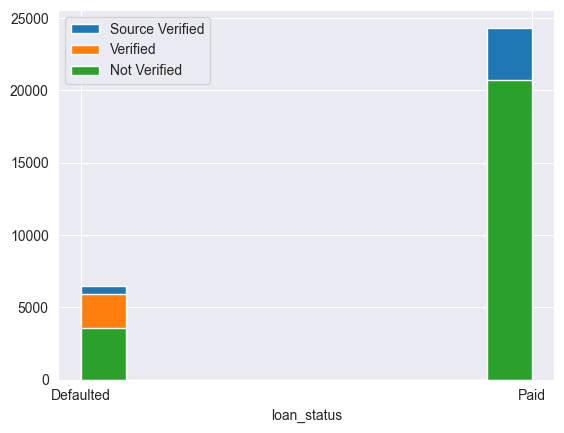

In [30]:
# create a histrogram to find the loan repayment status based on verfication.
sns.set_style('darkgrid')
plt.hist(train_df['loan_status'].loc[train_df['verification_status']=='Source Verified'], bins=10, label='Source Verified')
plt.hist(train_df['loan_status'].loc[train_df['verification_status']=='Verified'], bins=10, label='Verified')
plt.hist(train_df['loan_status'].loc[train_df['verification_status']=='Not Verified'], bins=10, label='Not Verified')
plt.legend()
plt.xlabel('loan_status')

<Axes: xlabel='term', ylabel='count'>

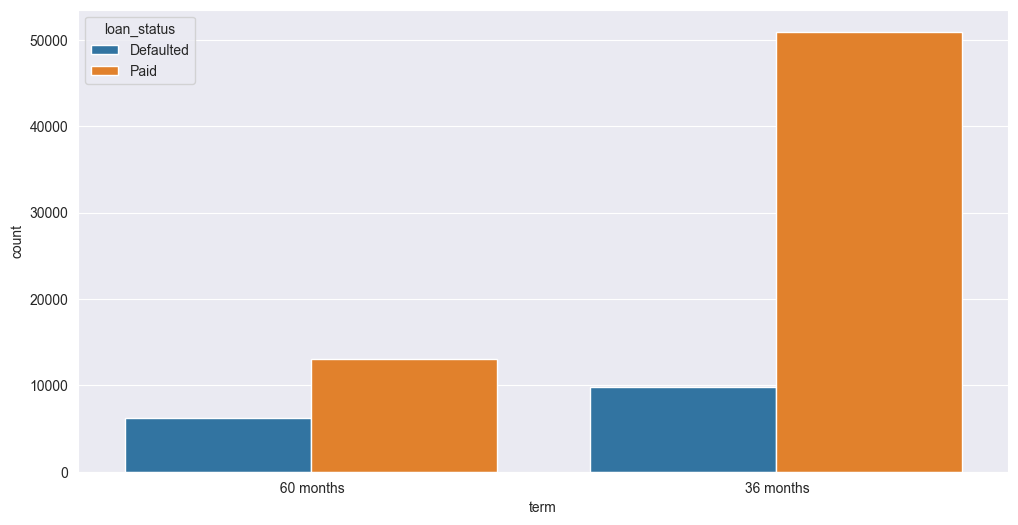

In [31]:
#creating a countplot to see the counts of loan repayment based on term.
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x='term', hue='loan_status')

In [32]:
train_df['emp_length'].value_counts()

emp_length
10+ years    26278
2 years       7319
3 years       6474
< 1 year      6297
1 year        5294
5 years       5094
4 years       4763
6 years       3691
7 years       3597
8 years       3583
9 years       3022
Name: count, dtype: int64

Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
def apply_label_encoding(data_frame , columns):
    encoded_data = data_frame.copy()
    for col in columns:
        label_encoder = LabelEncoder()
        encoded_data[col] = label_encoder.fit_transform(data_frame[col])
    return encoded_data

Normalize or standardize numerical features to ensure they have the same scale.

Feature engineering: Create new features or transformations that may help the model capture underlying patterns in the data, such as debt-to-income ratios or payment history.

In [35]:
train_df['emp_length'].value_counts()

emp_length
10+ years    26278
2 years       7319
3 years       6474
< 1 year      6297
1 year        5294
5 years       5094
4 years       4763
6 years       3691
7 years       3597
8 years       3583
9 years       3022
Name: count, dtype: int64

Data Spiliting

Split the data into training, validation, and testing sets. Common splits include 70% for training, 15% for validation, and 15% for testing.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = train_df.drop(['loan_status'], axis = 1)
y = train_df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size =0.2, random_state = 150)

In [38]:
print("\033[91mX_train Shape : \033[0m" , X_train.shape)
print("\033[91mX_test Shape : \033[0m" , X_test.shape)

X_train Shape :  (16000, 27)
X_test Shape :  (64000, 27)


In [39]:
X_train_encoded = apply_label_encoding(X_train , X)
X_test_encoded = apply_label_encoding(X_test , X)

In [40]:
print("\033[91mX_train Data : \033[0m")
print(X_train_encoded.sample(3))

print("\033[91mX_test Data : \033[0m")
print(X_test_encoded.sample(3))

X_train Data : 
       addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
1965           19          95                47          11       9215   
23958          34         404               454          11       9215   
8703           32        1028               369           4       1985   

       fico_range_high  fico_range_low  grade  home_ownership  \
1965                 1               1      2               2   
23958                4               4      0               1   
8703                 3               3      4               3   

       application_type  ...  pub_rec  pub_rec_bankruptcies  purpose  \
1965                  0  ...        0                     0        9   
23958                 0  ...        0                     0        2   
8703                  0  ...        0                     0        2   

       revol_bal  revol_util  sub_grade  term  title  total_acc  \
1965        5598         777         11     0    751         19   
239

In [41]:
X_train_num = X_train[X_train.describe().columns]

Model Selection:

Choose an appropriate machine learning algorithm for your prediction task. Common choices include logistic regression, decision trees, random forests, support vector machines, or gradient boosting methods.

In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
# I want to build with 1000 Decision Tree model - Hyperparameter

def train_and_predict(X_train , y_train , X_test , y_test , n_estimators):
    rfc = RandomForestClassifier(n_estimators = n_estimators , random_state = 0) # It will build on 10 Decision Trees
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    accuracy = accuracy_score(y_test , y_pred)
    return accuracy

In [44]:
# Currently we select 1000 decision tree
n_estimators = 1000
accuracy = train_and_predict(X_train_encoded ,y_train ,X_test_encoded, y_test , n_estimators)
print("\033[91mRandom Forest Model Accuracy acore with 1000 Decision Tree :\033[0m {:.4f}".format(accuracy))

Random Forest Model Accuracy acore with 1000 Decision Tree : 0.8006


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# # Create Grid Search function for Random Forest Classifier

rfc = RandomForestClassifier(random_state = 42)

param_grid = {
     'n_estimators' : [100 , 500 , 1000],
     'criterion' : ['gini' , 'entropy'],
     'max_depth' : [None , 10 , 20],
     'max_features' :['sqrt', 'log2', None],
     'min_samples_split' : [2 , 5 ,10],
     'min_samples_leaf' : [1 , 5 ,10 ,20]
 }

grid_search = GridSearchCV(estimator = rfc , param_grid = param_grid , cv = 5 , n_jobs = 1)
grid_search.fit(X_train_encoded , y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_encoded)

KeyboardInterrupt: 

You can also explore deep learning techniques like neural networks for more complex modeling.

Model Training:

Train the selected model on the training data using appropriate hyperparameters.

Monitor the model's performance on the validation set to avoid overfitting.

Model Evaluation:

Assess the model's performance using relevant evaluation metrics, such as accuracy, precision, recall, F1 score, or the area under the ROC curve.

Use cross-validation to ensure the model's generalizability.

Hyperparameter Tuning:

Optimize the model's hyperparameters to improve its predictive accuracy and generalization.

Model Deployment:

Deploy the trained model to make predictions on new loan applications. The deployment can be integrated into the loan approval process.

Monitoring and Maintenance:

Continuously monitor the model's performance and update it as needed to adapt to changing borrower behavior and economic conditions.

Periodically retrain the model on new data to keep it up-to-date.

Fairness and Ethical Considerations:

Ensure that the model is fair and transparent in its decisions, and that it does not lead to discrimination or biased outcomes. Implement measures to mitigate these risks.


Compliance and Regulations:

Keep up-to-date with lending regulations and ensure that your model complies with them.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
#from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import make_scorer,f1_score, accuracy_score,auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer 
#from imblearn.over_sampling import SMOTE
from scipy import stats
#import xgboost as xgb
import sklearn
     